In [3]:
import os
os.chdir("C:/Users/TTBDONMEZ/Desktop/UDACITY_DATA_SCIENTIST/TheDataScienceProcess")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# How is availability of Airbnbs changing by months in Seattle?

In [5]:
df_calendar = pd.read_csv('./seattle-calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
availability=df_calendar['available'].value_counts().reset_index()

availability

#count of available =f and nulls of price are the same ,and checking the data,understood that if the listing is not available there is no price for it in calendar data

,index,available
0,t,934542
1,f,459028


In [8]:
availability_date=df_calendar.drop(['listing_id','price'], axis=1)

#changing data type of date column to datetime
availability_date['date'] = pd.to_datetime(availability_date['date'])

#changing data column to be YearMonth
availability_date['date'] = availability_date['date'].map(lambda x: 100*x.year + x.month)

available_monthly=pd.DataFrame(availability_date.query("available=='t'")['date'].value_counts())

available_monthly=available_monthly.rename(columns={'date':'available_count'})

available_monthly.reset_index(inplace=True)

available_monthly=available_monthly.rename(columns={'index':'YearMonth'})

available_monthly

,YearMonth,available_count
0,201612,87061
1,201603,83938
2,201610,82438
3,201611,81780
4,201605,79971
5,201609,77246
6,201606,77244
7,201608,76347
8,201604,76037
9,201607,74222


In [9]:
total_monthly=pd.DataFrame(availability_date['date'].value_counts())

total_monthly=total_monthly.rename(columns={'date':'total_count'})

total_monthly.reset_index(inplace=True)

total_monthly=total_monthly.rename(columns={'index':'YearMonth'})

total_monthly

,YearMonth,total_count
0,201612,118358
1,201608,118358
2,201610,118358
3,201605,118358
4,201607,118358
5,201603,118358
6,201609,114540
7,201611,114540
8,201604,114540
9,201606,114540


In [10]:
#merging two data frames 
avail_months = pd.merge(available_monthly,
                 total_monthly,
                 on='YearMonth')

avail_months

,YearMonth,available_count,total_count
0,201612,87061,118358
1,201603,83938,118358
2,201610,82438,118358
3,201611,81780,114540
4,201605,79971,118358
5,201609,77246,114540
6,201606,77244,114540
7,201608,76347,118358
8,201604,76037,114540
9,201607,74222,118358


In [17]:
avail_months['perc']=(avail_months['available_count']/avail_months['total_count'])*100

avail_months #adding percentage of available listings to data frame

,YearMonth,available_count,total_count,perc
0,201612,87061,118358,73.557343
1,201603,83938,118358,70.918738
2,201610,82438,118358,69.651397
3,201611,81780,114540,71.398638
4,201605,79971,118358,67.567042
5,201609,77246,114540,67.440196
6,201606,77244,114540,67.438449
7,201608,76347,118358,64.505145
8,201604,76037,114540,66.384669
9,201607,74222,118358,62.709745


In [18]:
avail_months_prc=avail_months.drop(['available_count','total_count'], axis=1)

In [21]:
avail_months_prc=avail_months_prc.set_index('YearMonth')

In [22]:
avail_months_prc.sort_index(inplace=True)

In [23]:
avail_months_prc

,perc
YearMonth,
201601,55.413268
201602,66.220805
201603,70.918738
201604,66.384669
201605,67.567042
201606,67.438449
201607,62.709745
201608,64.505145
201609,67.440196


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

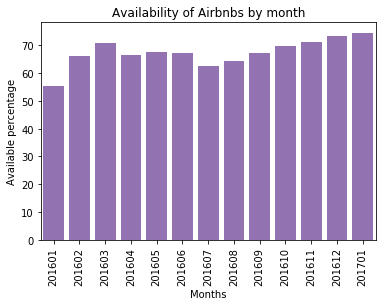

In [24]:
base_color = sns.color_palette()[4]

sns.barplot(avail_months_prc.index.values,avail_months_prc.perc, color = base_color)
plt.xlabel('Months')
plt.ylabel('Available percentage')
plt.title('Availability of Airbnbs by month')
plt.xticks(rotation = 90)

# How is price changing city by city of Seattle airbnbs?

In [26]:
city_based_prices =  pd.read_csv('./seattle-listings.csv',usecols=['city','price'])

city_based_prices.head()

,city,price
0,Seattle,$85.00
1,Seattle,$150.00
2,Seattle,$975.00
3,Seattle,$100.00
4,Seattle,$450.00


In [27]:
#checking if there are nulls in the data
city_based_prices.isnull().sum()

city     0
price    0
dtype: int64

In [28]:
#price object has wrong data type, firstly we need to fix it, with below function

def get_floatPrice(df):
    '''
    INPUT - df - pandas dataframe with the price data type object
           
    OUTPUT -df - pandas dataframe with the price data type float
    '''
    df['price'] = df['price'].map(lambda x: x.replace("$",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(".",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(",",""))
    
    df['price'] = df['price'].apply(lambda x: float(x))
    
    df['price'] = df['price']/100
    
    df=df
    
    return df

In [29]:
get_floatPrice(city_based_prices)

,city,price
0,Seattle,85.0
1,Seattle,150.0
2,Seattle,975.0
3,Seattle,100.0
4,Seattle,450.0
...,...,...
3813,Seattle,359.0
3814,Seattle,79.0
3815,Seattle,93.0
3816,Seattle,99.0


In [30]:
#because of the space at the end of Seattle, grouping would not work properly , so we fixed it by replacing 
city_based_prices['city']=city_based_prices['city'].replace("Seattle ","Seattle")

#because of the little letter of seattle, grouping would not work properly , so we fixed it by replacing 
city_based_prices['city']=city_based_prices['city'].replace("seattle","Seattle")

city_based_prices['city']=city_based_prices['city'].replace("西雅图","Seattle")

city_based_prices=pd.DataFrame(city_based_prices.groupby(['city'])['price'].mean())

city_based_prices

,price
city,
"Ballard, Seattle",116.000000
Phinney Ridge Seattle,60.000000
Seattle,128.006555
West Seattle,110.000000


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

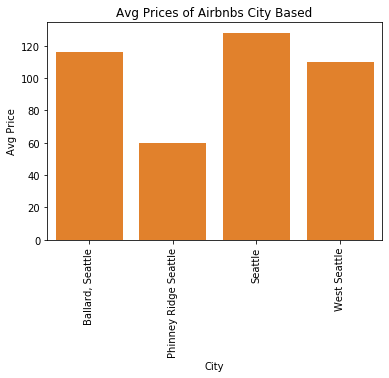

In [31]:
base_color = sns.color_palette()[1]

sns.barplot(city_based_prices.index.values,city_based_prices.price,color = base_color)
plt.xlabel('City')
plt.ylabel('Avg Price')
plt.title('Avg Prices of Airbnbs City Based')
plt.xticks(rotation = 90)

# How is price changing when comparing Seattle and Boston airbnbs?

In [32]:
df_boston_calendar= pd.read_csv('./boston-calendar.csv')

df_seattle_calendar=pd.read_csv('./seattle-calendar.csv')

df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [34]:
#dropping nulls, while data understanding I saw that only available ==f has no price, so dropped nulls
boston_price_dates=pd.DataFrame(df_boston_calendar.dropna(subset=['price'],how='any'))

boston_price_dates.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [35]:
#dropping nulls, while data understanding I saw that only available ==f has no price, so dropped nulls
seattle_price_dates=pd.DataFrame(df_seattle_calendar.dropna(subset=['price'],how='any'))

seattle_price_dates.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [36]:
get_floatPrice(boston_price_dates)

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0
...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0
1308876,14504422,2016-09-19,t,62.0
1308877,14504422,2016-09-18,t,62.0
1308878,14504422,2016-09-17,t,62.0


In [37]:
get_floatPrice(seattle_price_dates)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [38]:
#fixing data type of date
boston_price_dates['date'] = pd.to_datetime(boston_price_dates['date'])

#getting year month
boston_price_dates['YearMonth'] = boston_price_dates['date'].map(lambda x: 100*x.year + x.month)

#dropping unnecessary columns
boston_price_yearmonths=boston_price_dates.drop(['available','date','listing_id'], axis=1)

#grouping by months and calucalting average prices
boston_price_months=pd.DataFrame(boston_price_yearmonths.groupby(['YearMonth'])['price'].mean())

boston_price_months

,price
YearMonth,
201609,252.677308
201610,233.416248
201611,202.924416
201612,192.601915
201701,182.799671
201702,180.961028
201703,181.818742
201704,197.252890
201705,193.712295


In [39]:
seattle_price_dates['date'] = pd.to_datetime(seattle_price_dates['date'])

seattle_price_dates['YearMonth'] = seattle_price_dates['date'].map(lambda x: 100*x.year + x.month)

seattle_price_yearmonths=seattle_price_dates.drop(['available','date','listing_id'], axis=1)

seattle_price_months=pd.DataFrame(seattle_price_yearmonths.groupby(['YearMonth'])['price'].mean())

seattle_price_months

,price
YearMonth,
201601,121.568409
201602,124.293927
201603,128.644488
201604,135.097005
201605,139.538183
201606,147.473137
201607,152.094150
201608,150.656594
201609,143.255949


In [40]:
boston_price_yearmonths['price'].describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

In [41]:
seattle_price_yearmonths['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [42]:
# Change the price column label to Seattle
seattle_price_months = seattle_price_months.rename(columns={'price':'Seattle'})

# Change the price column label to Boston
boston_price_months = boston_price_months.rename(columns={'price':'Boston'})

#merging two data frames 
comp_price_months = pd.merge(seattle_price_months,
                 boston_price_months,
                 on='YearMonth')

comp_price_months

,Seattle,Boston
YearMonth,,
201609,143.255949,252.677308
201610,137.031939,233.416248
201611,135.688738,202.924416
201612,137.251835,192.601915
201701,136.882590,182.799671


In [43]:
comp_price_months['Diff_Price'] = comp_price_months['Boston'] - comp_price_months['Seattle']
comp_price_months.style.bar(subset=['Diff_Price'], align='mid', color=['#d65f5f', '#5fba7d'])

,Seattle,Boston,Diff_Price
YearMonth,,,
201609,143.255949,252.677308,109.421360
201610,137.031939,233.416248,96.384309
201611,135.688738,202.924416,67.235678
201612,137.251835,192.601915,55.350080
201701,136.882590,182.799671,45.917080


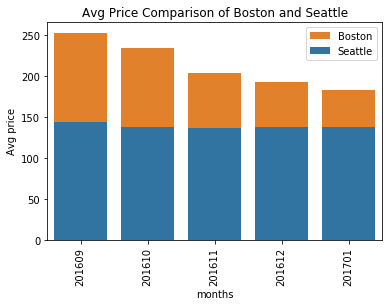

In [44]:
base_color = sns.color_palette()[1] # 1 orange, 0 blue
base_color_2 = sns.color_palette()[0]
sns.barplot(comp_price_months.index.values,comp_price_months.Boston,color = base_color, label='Boston')
sns.barplot(comp_price_months.index.values,comp_price_months.Seattle, color = base_color_2, label='Seattle')
plt.xticks(rotation = 90)
plt.xlabel('months')
plt.ylabel('Avg price')
plt.title('Avg Price Comparison of Boston and Seattle')
plt.legend()